In [1]:
import networkx
import matplotlib.pyplot as plt

In [2]:
graph = networkx.read_edgelist('../lab_03/word_association_graph_DSF.txt', 
                               create_using=networkx.DiGraph(), 
                               nodetype=str, data=[('weight', float),])

In [3]:
out_degrees = {}        
for node in graph.nodes():
    out_degrees[node] = 0
        
for node_a, node_b in graph.edges():
    out_degrees[node_a] += 1

In [4]:
in_degrees = {}        
for node in graph.nodes():
    in_degrees[node] = 0
        
for node_a, node_b in graph.edges():
    in_degrees[node_b] += 1

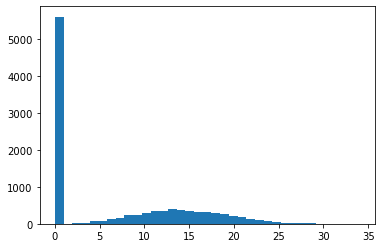

In [5]:
_ = plt.hist(out_degrees.values(), bins=35)

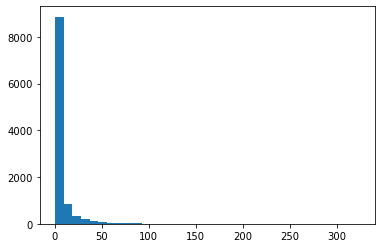

In [6]:
_ = plt.hist(in_degrees.values(), bins=35)

In [7]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [8]:
_ = plt.hist(in_degrees.values(), bins=35)

In [9]:
%matplotlib inline

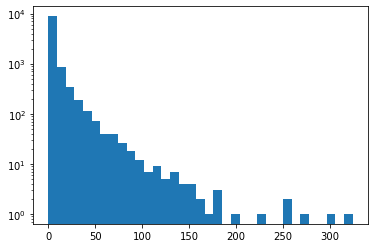

In [10]:
_ = plt.hist(in_degrees.values(), bins=35, log=True)

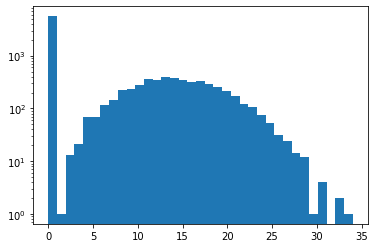

In [11]:
_ = plt.hist(out_degrees.values(), bins=35, log=True)

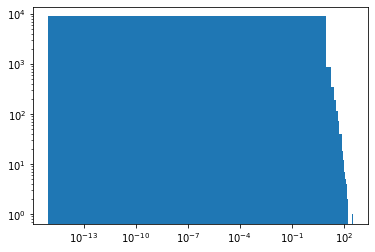

In [12]:
plt.xscale('log')
_ = plt.hist(in_degrees.values(), bins=35, log=True)

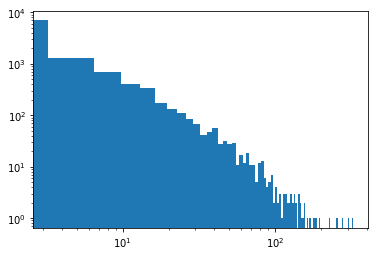

In [13]:
plt.xscale('log')
_ = plt.hist(in_degrees.values(), bins=100, log=True)

In [14]:
len(set((out_degrees.values())))

34

In [15]:
max(in_degrees.values())

324

In [16]:
sum(in_degrees.values()) / len(in_degrees.values())

6.798323285606632

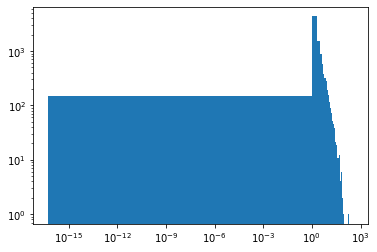

In [17]:
plt.xscale('log')
_ = plt.hist(in_degrees.values(), bins=325, log=True)

In [18]:
import powerlaw

In [19]:
# to install the "powerlaw" module, you can run in a jupyter notebook: "!pip install powerlaw"

In [20]:
fit = powerlaw.Fit(list(in_degrees.values()))


Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


In [21]:
fit

In [22]:
fit.power_law.alpha

2.9852246312570587

In [23]:
R, p = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)

In [24]:
R, p

(0.773738003221026, 0.43908574152893753)

# Ring & shortcuts network


Given a ring network of N nodes (first & second neighbor connections), add N/2 "shortcut edges" at random.
What is the average clustering coefficient as N goes to infinity?


In [25]:
from homework import ring_network

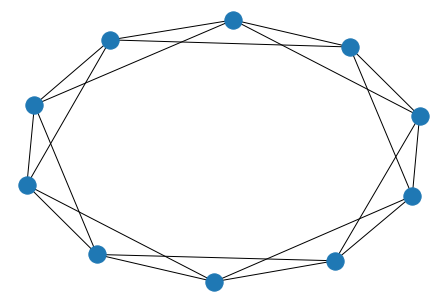

In [26]:
networkx.draw(ring_network(10))

In [27]:
networkx.average_clustering(ring_network(10))

0.5

In [28]:
import random

In [29]:
random.choice?

In [38]:
def add_shortcuts(g):
    nodes = list(g.nodes())
    for i in range(int(g.number_of_nodes()/2)):
        node_a = random.choice(nodes)
        node_b = random.choice(nodes)
        g.add_edge(node_a, node_b)
    return g

In [39]:
networkx.average_clustering(add_shortcuts(ring_network(10)))

0.4666666666666666

In [32]:
g = ring_network(10)

In [35]:
random.choice(list(g.nodes()))

3

In [36]:
random.choice(g.nodes())

{}

In [37]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [40]:
g.add_edge(1,1)

In [46]:
def add_shortcuts2(g):
    nodes = list(g.nodes())
    for i in range(int(g.number_of_nodes()/2)):
        node_a = random.choice(nodes)
        remaining_nodes = list(nodes)
        remaining_nodes.remove(node_a)
        node_b = random.choice(remaining_nodes)
        g.add_edge(node_a, node_b)
    return g

In [47]:
for i in range(10):
    g = add_shortcuts(ring_network(10))
    print(g.number_of_nodes(), g.number_of_edges())

10 22
10 24
10 24
10 24
10 22
10 22
10 23
10 22
10 25
10 22


In [48]:
g.has_edge(0,1)

True

In [49]:
g.add_edge(0,1)

In [50]:
g

In [42]:
g = ring_network(10)
print(g.number_of_nodes(), g.number_of_edges())

10 20


In [51]:
def add_shortcuts3(g):
    nodes = list(g.nodes())
    while g.number_of_edges() < (g.number_of_nodes()*2.5):
        node_a = random.choice(nodes)
        remaining_nodes = list(nodes)
        remaining_nodes.remove(node_a)
        node_b = random.choice(remaining_nodes)
        g.add_edge(node_a, node_b)
    return g

In [52]:
for i in range(10):
    g = add_shortcuts3(ring_network(10))
    print(g.number_of_nodes(), g.number_of_edges())

10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25


In [54]:
def add_shortcuts4(g):
    nodes = list(g.nodes())
    while g.number_of_edges() < (g.number_of_nodes()*2.5):
        node_a = random.choice(nodes)
        node_b = random.choice(nodes)
        if (node_a != node_b) and not g.has_edge(node_a, node_b):
            g.add_edge(node_a, node_b)
    return g

In [55]:
for i in range(10):
    g = add_shortcuts4(ring_network(10))
    print(g.number_of_nodes(), g.number_of_edges())

10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25
10 25


In [56]:
networkx.average_clustering(add_shortcuts4(ring_network(10)))

0.5166666666666667

In [57]:
networkx.average_clustering(add_shortcuts4(ring_network(100)))

0.35614285714285715

In [58]:
networkx.average_clustering(add_shortcuts4(ring_network(1000)))

0.3423285714285729

In [59]:
networkx.average_clustering(add_shortcuts4(ring_network(10000)))

0.34147333333334673

In [60]:
networkx.average_clustering(add_shortcuts4(ring_network(100000)))

KeyboardInterrupt: 

In [ ]:
networkx.average_clustering(add_shortcuts4(ring_network(infinity)))

In [64]:
N_list = [10, 20, 50, 100, 200, 500, 1000, 2000]

In [65]:
values = [networkx.average_clustering(add_shortcuts4(ring_network(N))) for N in N_list]

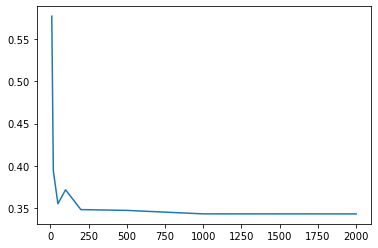

In [66]:
plt.plot(N_list, values)

Our computational result: 0.35 +- 0.02

Our theoretical result was: 0.5